In [11]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import randomcolor
import random
import seaborn as sns
from tcrdist.repertoire import TCRrep
from sklearn.preprocessing import normalize
from sklearn import cluster
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from pynndescent.utils import seed
from tcrdist.public import _neighbors_fixed_radius

### Load Processed Data  
Rename the columns of the data to fit the tcrdist.  

In [ ]:
# # read VDjdb dataset
# VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")

# method = VDJdb['method']

# method_dict_component = []
# for row in range(0, method.index.stop, 1):
#     method_dict_component.append(json.loads(method[row])['frequency'])
    
# VDJdb['frequency'] = method_dict_component
# display(VDJdb)

In [2]:
# Load all data
VDJdb_TRA_human_fix = pd.read_csv('Processed_TRA_Conf_by_GIANA.csv')
display(VDJdb_TRA_human_fix)

VDJdb_TRA_human_fix = VDJdb_TRA_human_fix.rename(columns = {'V1': 'cdr3_a_aa', 'V3': 'v_a_gene', 'V4': 'j_a_gene', 'V6':'antigen.species'})
VDJdb_TRA_human_fix = VDJdb_TRA_human_fix[["cdr3_a_aa", "v_a_gene", "j_a_gene", "antigen.species"]]
display(VDJdb_TRA_human_fix)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V6.1,V7,V8,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
0,CAASFSDGQKLLF,CAASFSDGQKLLF,1,TRAV13-1*01,NaN,PKYVKQNTLKLAT,InfluenzaA,-0.131946,-0.122627,0.180292,...,-0.600459,-0.090567,0.221479,-0.330294,0.556356,-0.541500,0.054591,0.573342,-0.062271,0.652999
1,CAASFSDGQKLLF.1,CAASFSDGQKLLF,1,TRAV13-1*01,NaN,PKYVKQNTLKLAT,InfluenzaA,-0.131946,-0.122627,0.180292,...,-0.600459,-0.090567,0.221479,-0.330294,0.556356,-0.541500,0.054591,0.573342,-0.062271,0.652999
2,CAASIGAGNMLTF,CAASIGAGNMLTF,2,TRAV29/DV5*01,TRAJ39*01,NLVPMVATV,CMV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
3,CAASIGAGNMLTF.1,CAASIGAGNMLTF,2,TRAV29/DV5*01,TRAJ39*01,NLVPMVATV,CMV,-0.330413,-0.438601,-0.550938,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
4,CAASMNGDDKIIF,CAASMNGDDKIIF,3,TRAV23/DV6*01,TRAJ30*01,GMFNMLSTVLGVS,InfluenzaA,-0.422125,0.122257,0.162796,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,CLVGSPVPFSGGYNKLIF.1,CLVGSPVPFSGGYNKLIF,416,TRAV4*01,TRAJ4*01,NLVPMVATV,CMV,-0.462359,-0.561227,-0.370646,...,1.221860,1.126777,0.535163,0.207328,-0.574577,-0.784084,-0.119884,0.895657,-0.388549,-0.055234
1499,CAADTLLNAGGTSYGKLTF,CAADTLLNAGGTSYGKLTF,417,TRAV13-1*01,TRAJ52*01,NLVPMVATV,CMV,0.247162,-0.242762,-0.928951,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
1500,CAADTLLNAGGTSYGKLTF.1,CAADTLLNAGGTSYGKLTF,417,TRAV13-1*01,TRAJ52*01,NLVPMVATV,CMV,0.247162,-0.242762,-0.928951,...,0.208611,-0.173046,-0.782782,0.103752,-0.537859,0.720856,-0.197778,-0.009423,-0.952306,0.570936
1501,CAAIPVRNGRMNYGGSQGNLIF,CAAIPVRNGRMNYGGSQGNLIF,418,TRAV29/DV5*01,TRAJ42*01,GILGFVFTL,InfluenzaA,-0.660825,-0.877201,-1.101875,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


,cdr3_a_aa,v_a_gene,j_a_gene,antigen.species
0,CAASFSDGQKLLF,TRAV13-1*01,NaN,InfluenzaA
1,CAASFSDGQKLLF,TRAV13-1*01,NaN,InfluenzaA
2,CAASIGAGNMLTF,TRAV29/DV5*01,TRAJ39*01,CMV
3,CAASIGAGNMLTF,TRAV29/DV5*01,TRAJ39*01,CMV
4,CAASMNGDDKIIF,TRAV23/DV6*01,TRAJ30*01,InfluenzaA
...,...,...,...,...
1498,CLVGSPVPFSGGYNKLIF,TRAV4*01,TRAJ4*01,CMV
1499,CAADTLLNAGGTSYGKLTF,TRAV13-1*01,TRAJ52*01,CMV
1500,CAADTLLNAGGTSYGKLTF,TRAV13-1*01,TRAJ52*01,CMV
1501,CAAIPVRNGRMNYGGSQGNLIF,TRAV29/DV5*01,TRAJ42*01,InfluenzaA


In [14]:
# Rename the columns of the data
VDJdb_TRA_human_fix = pd.read_csv('VDJdb_TRA_human_Conf_GIANA.txt', sep='\t')
display(VDJdb_TRA_human_fix)

VDJdb_TRA_human_fix = VDJdb_TRA_human_fix.rename(columns = {'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
VDJdb_TRA_human_fix = VDJdb_TRA_human_fix[["cdr3_a_aa", "v_a_gene", "j_a_gene", "antigen.species"]]
display(VDJdb_TRA_human_fix)

VDJdb_TRA_human_fix["cdr3_a_aa"] = [x[4:-1] for x in VDJdb_TRA_human_fix["cdr3_a_aa"]]
display(VDJdb_TRA_human_fix)

,cdr3,v.segm,j.segm,antigen.epitope,antigen.species,frequency
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEKGGL,HIV-1,NaN
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,FLKEKGGL,HIV-1,NaN
2,CAVKASGSRLT,TRAV2*01,NaN,FLKEKGGL,HIV-1,NaN
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,FLKEKGGL,HIV-1,NaN
4,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEQGGL,HIV-1,NaN
...,...,...,...,...,...,...
2592,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,QYIKWPWYI,SARS-CoV-2,1/11
2593,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,QYIKWPWYI,SARS-CoV-2,1/11
2594,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,QYIKWPWYI,SARS-CoV-2,1/11
2595,CLVGENSGGFKTIF,TRAV4*01,TRAJ9*01,QYIKWPWYI,SARS-CoV-2,1/11


,cdr3_a_aa,v_a_gene,j_a_gene,antigen.species
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HIV-1
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HIV-1
2,CAVKASGSRLT,TRAV2*01,NaN,HIV-1
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HIV-1
4,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HIV-1
...,...,...,...,...
2592,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,SARS-CoV-2
2593,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,SARS-CoV-2
2594,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,SARS-CoV-2
2595,CLVGENSGGFKTIF,TRAV4*01,TRAJ9*01,SARS-CoV-2


,cdr3_a_aa,v_a_gene,j_a_gene,antigen.species
0,APGRADMR,TRAV26-1*01,TRAJ43*01,HIV-1
1,SGAGSYQLT,TRAV20*01,TRAJ28*01,HIV-1
2,ASGSRL,TRAV2*01,NaN,HIV-1
3,PPGTYKYI,TRAV38-2/DV8*01,TRAJ40*01,HIV-1
4,APGRADMR,TRAV26-1*01,TRAJ43*01,HIV-1
...,...,...,...,...
2592,NQGGKLI,TRAV8-1*01,TRAJ23*01,SARS-CoV-2
2593,ALYNFNKFY,TRAV3*01,TRAJ21*01,SARS-CoV-2
2594,SYNTDKLI,TRAV41*01,TRAJ34*01,SARS-CoV-2
2595,ENSGGFKTI,TRAV4*01,TRAJ9*01,SARS-CoV-2


In [15]:
#VDJdb_TRA_human_fix = pd.read_csv('VDJdb_TRA_human_fix.csv')
#display(VDJdb_TRA_human_fix)

# Call the function to generate a tcr tree for alpha chain
df_alpha = VDJdb_TRA_human_fix
tr_alpha = TCRrep(cell_df = df_alpha,
            organism = 'human',
            chains = ['alpha'],
            deduplicate = False,
            db_file = "alphabeta_gammadelta_db.tsv",
            compute_distances=False)

D:\Anaconda Python\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Anaconda Python\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [16]:
# Compute alpha chain distance matrix 
tr_alpha.compute_distances()

In [17]:
# Print distance matrix
dist_matrix_alpha = tr_alpha.pw_alpha
print(dist_matrix_alpha[0, 0:50])
dist_matrix_alpha.shape
#print(_neighbors_fixed_radius(dist_matrix_alpha, 100))

[  0  99  83  86   0  99  83   0  99  83   0  99  83 119  93  93  93 113
  93  93  93 110  89 113  95 127  98  95 109 113 113 110  98  72  72  72
 119  85  85  80 104  99 132  80 108 108 107 108 105 105]


(2597, 2597)

In [18]:
# Normolize the distance matrix
Nor_dist_matrix_alpha = normalize(dist_matrix_alpha, axis=1, norm='l1')

In [19]:
# To define two methods to plot the umap dimension reduction results.
def draw_scatter(epitope, UMAP_fit, label):
    class_list = np.unique(epitope)  # 21个label
    n_class = len(class_list)  # label类别数
    palette = sns.hls_palette(n_colors=n_class)  # 配色方案
    plt.figure(figsize=(8, 8))
    
    for idx, species in enumerate(class_list):  # 遍历每个类别
        # 获取颜色和点型
        color = palette[idx]
        #marker = marker_list[idx % len(marker_list)]
        # 找到所有标注类别为当前类别的图像索引号
        indices = np.where(epitope == species)
        plt.scatter(UMAP_fit[indices, 0], UMAP_fit[indices, 1], color=color, label=label.iloc[species,0], s=30)  # , s=150
    plt.legend(fontsize=10, markerscale=1, bbox_to_anchor=(1, 1))
    
    
def label_gen(data):
    VDJ_test = data
    epitope = VDJ_test['antigen.species']
    epitope = pd.Categorical(epitope).codes
    spec_label_rep = pd.DataFrame({"antitope":data['antigen.species'], "label":epitope})
    spec_label = spec_label_rep.drop_duplicates(keep='first')
    spec_label = spec_label.sort_values("label")
    #display(TRA_spec_label)
    return spec_label, epitope

In [20]:
# VDJ_test = VDJdb_TRA_human_fix
# TRA_epitope_species = VDJ_test['antigen.species']
# TRA_epitope_label = pd.Categorical(TRA_epitope_species).codes
# TRA_labels_len = len(set(TRA_epitope_label))
# print(TRA_epitope_label)

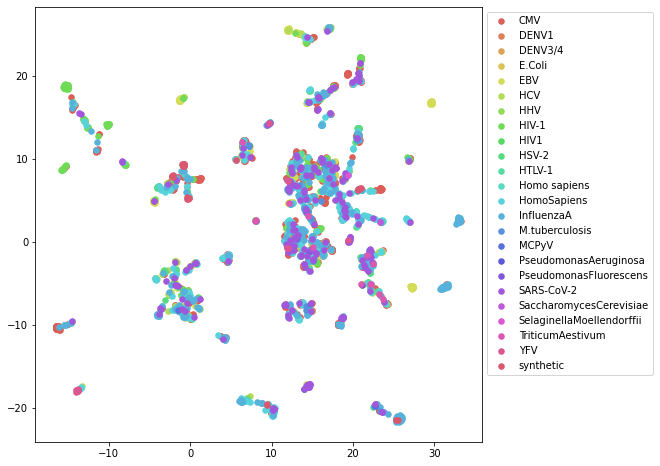

In [23]:
# To create a UMAP model
umap_TRA = umap.UMAP(random_state=42, n_components=2, min_dist=0.5)

TRA_spec_label, epitope = label_gen(VDJdb_TRA_human_fix)

TRA_umap_fit = umap_TRA.fit_transform(Nor_dist_matrix_alpha)

draw_scatter(epitope, TRA_umap_fit, TRA_spec_label)

In [28]:
TRA_labels_len = len(set(epitope))
TRA_Kmeans_cluster= cluster.KMeans(n_clusters = TRA_labels_len, random_state = 42)
TRA_cluster_labels = TRA_Kmeans_cluster.fit_predict(TRA_umap_fit)
print(TRA_cluster_labels)

[14  6  6 ... 16 14 10]


D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda Python\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [29]:
random.seed(10)
color_TRA = {}
for c in set(TRA_cluster_labels):
    color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

#color_TRB = {}
#for c in set(TRB_cluster_labels):
#  color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

#for c in set(TRA_cluster_labels_TSNE):
#  color_TRA[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

#color_TRB = {}
#for c in set(TRB_cluster_labels_TSNE):
#  color_TRB[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

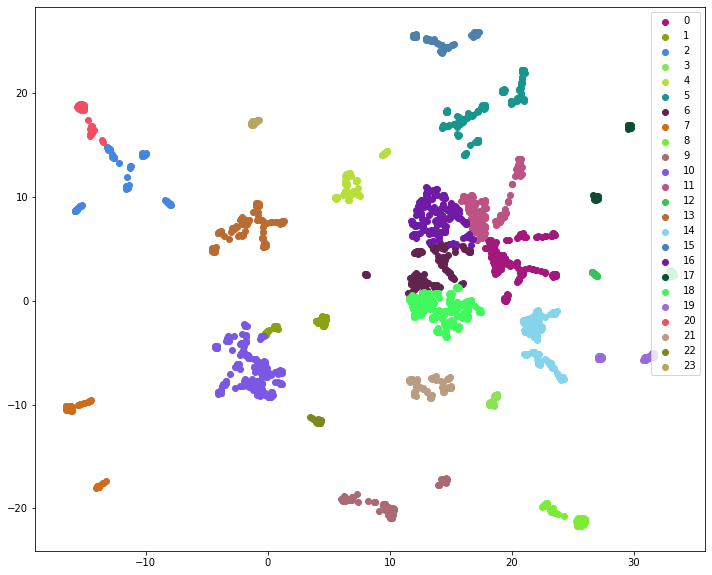

In [30]:
# Plot cluster result
plt.figure(figsize=(12,10))
for label in set(TRA_cluster_labels):
    plt.scatter(TRA_umap_fit[TRA_cluster_labels == label ,0], 
              TRA_umap_fit[TRA_cluster_labels == label,1], c=color_TRA[label], label=label)
plt.legend()
plt.show()

In [33]:
VDJ_test = VDJdb_TRA_human_fix
TRA_epitope_species = VDJ_test['antigen.species']
TRA_epitope_label = pd.Categorical(TRA_epitope_species).codes
TRA_labels_len = len(set(TRA_epitope_label))
print(TRA_epitope_label)

TRA_spec_label_rep = pd.DataFrame({"antitope":TRA_epitope_species, "label":TRA_epitope_label})
TRA_spec_label = TRA_spec_label_rep.drop_duplicates(keep='first')

[ 7  7  7 ... 18 18 18]


In [34]:
# To print one cluster's label
label_index = np.where(TRA_cluster_labels == 12)
label_index = np.array(label_index).flatten()
#print(label_index)
TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
TRA_label_repeat = TRA_label_repeat["antitope"]
count = dict(Counter(TRA_label_repeat))
print(count)

{'HomoSapiens': 13, 'InfluenzaA': 30, 'CMV': 3, 'SARS-CoV-2': 1}


In [35]:
# To print what labels contain in each cluster

print("TRA_UMAP: \n")
for l in set(TRA_cluster_labels):
    label_index = np.where(TRA_cluster_labels == l)
    label_index = np.array(label_index).flatten()
    #print(label_index)
    TRA_label_repeat = TRA_spec_label_rep.loc[label_index,:]
    TRA_label_repeat = TRA_label_repeat["antitope"]
    count = dict(Counter(TRA_label_repeat))
    print(count)


TRA_UMAP: 

{'HomoSapiens': 71, 'HIV-1': 6, 'HTLV-1': 11, 'SaccharomycesCerevisiae': 1, 'synthetic': 6, 'Homo sapiens': 1, 'SARS-CoV-2': 26, 'HSV-2': 5, 'CMV': 30, 'HCV': 4, 'InfluenzaA': 17, 'EBV': 3, 'YFV': 1}
{'SARS-CoV-2': 5, 'HSV-2': 1, 'HCV': 13, 'CMV': 17, 'HomoSapiens': 13, 'InfluenzaA': 4, 'HIV-1': 1}
{'CMV': 28, 'EBV': 1, 'SARS-CoV-2': 2, 'InfluenzaA': 3, 'HIV-1': 58, 'HomoSapiens': 3}
{'CMV': 18, 'InfluenzaA': 6, 'SARS-CoV-2': 13}
{'HIV-1': 6, 'HomoSapiens': 16, 'synthetic': 1, 'TriticumAestivum': 1, 'M.tuberculosis': 4, 'SARS-CoV-2': 6, 'HSV-2': 2, 'CMV': 32, 'InfluenzaA': 4, 'EBV': 3, 'HCV': 1, 'YFV': 1}
{'HIV-1': 23, 'HTLV-1': 1, 'HomoSapiens': 15, 'HHV': 1, 'CMV': 59, 'SARS-CoV-2': 20, 'HSV-2': 7, 'InfluenzaA': 20, 'EBV': 6}
{'HIV-1': 17, 'M.tuberculosis': 9, 'InfluenzaA': 29, 'HomoSapiens': 23, 'HCV': 4, 'TriticumAestivum': 4, 'Homo sapiens': 1, 'CMV': 50, 'DENV1': 1, 'DENV3/4': 1, 'SARS-CoV-2': 9, 'EBV': 14}
{'HomoSapiens': 8, 'CMV': 47, 'InfluenzaA': 4, 'HCV': 1, 'YFV